In [3]:
# %matplotlib inline
%matplotlib notebook

try:
    from importlib import reload
except:
    pass

from __future__ import print_function ## Force python3-like printing

from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import sys
import numpy as np
from astropy.table import Table

import pycoco as pcc

# reload(pcc) ## FOR DEV
# reload(pcc.defaults)
# reload(pcc.functions)

inputs:

* **`snname`**
* **`redshift`**
* **`absmag offset`**
* **`EBV MW`**
* **`EBV Host`**
* **`Rv`**
* **`MJD at Peak`**

* **`MJD to simulate`**
* **`filters to simulate`**

In [4]:
# sn = pcc.classes.SNClass("SN2006aj")
# sn = pcc.classes.SNClass("SN1998bw")
sn = pcc.classes.SNClass("iPTF13bvn")

print(sn.name)
sn.load_phot(path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+sn.name + '.dat'))
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, sn.name + ".dat"))


iPTF13bvn


<IPython.core.display.Javascript object>


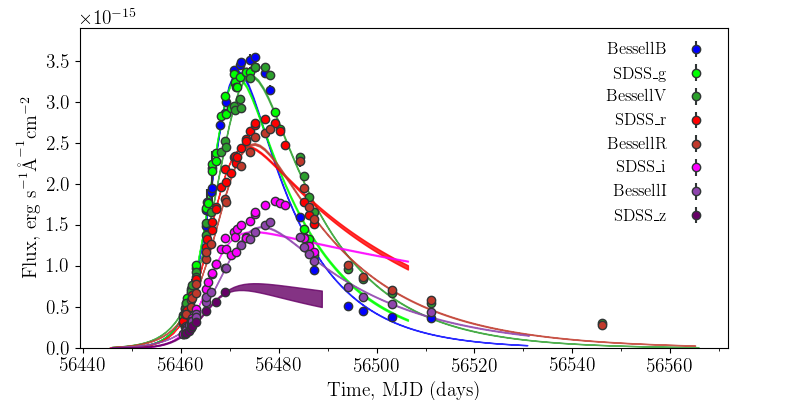

In [5]:
sn.plot_lc(multiplot=False)

In [12]:
chains_dirpath = os.path.join(pcc.defaults._default_coco_dir_path, "chains/"+sn.name+"/")

stat_list = [i for i in os.listdir(chains_dirpath) if i.split("-")[0] in sn.phot.filter_names and i.split("-")[-1] == "stats.dat"]
summary_list = [i for i in os.listdir(chains_dirpath) if i.split("-")[0] in sn.phot.filter_names and i.split("-")[-1] == "summary.txt"]

for i in zip(stat_list, summary_list): print(i)

('BessellB-stats.dat', 'BessellB-summary.txt')
('BessellI-stats.dat', 'BessellI-summary.txt')
('BessellR-stats.dat', 'BessellR-summary.txt')
('BessellV-stats.dat', 'BessellV-summary.txt')
('SDSS_g-stats.dat', 'SDSS_g-summary.txt')
('SDSS_i-stats.dat', 'SDSS_i-summary.txt')
('SDSS_r-stats.dat', 'SDSS_r-summary.txt')
('SDSS_z-stats.dat', 'SDSS_z-summary.txt')


In [13]:
summary_path = os.path.join(chains_dirpath, summary_list[-3])

print(summary_path)

summary = np.loadtxt(summary_path)

/Users/berto/Code/CoCo/chains/iPTF13bvn/SDSS_i-summary.txt


In [14]:
summary

array([[  8.85550994e-01,   2.48000152e+00,   9.91722845e+01,
          5.12592642e+00,   3.57544124e-03,   1.61439665e-02,
          8.23868378e-01,   3.79597108e-02,   8.85413583e-01,
          2.48134696e+00,   9.99941221e+01,   5.12584643e+00,
          8.84407134e-01,   2.47942392e+00,   9.83674817e+01,
          5.12697522e+00,  -7.45298847e+02,  -7.16980867e+02],
       [  8.85550994e-01,   2.48000152e+00,   9.91722845e+01,
          5.12592642e+00,   3.57544123e-03,   1.61439665e-02,
          8.23868377e-01,   3.79597108e-02,   8.85413583e-01,
          2.48134696e+00,   9.99941221e+01,   5.12584643e+00,
          8.84407134e-01,   2.47942392e+00,   9.83674817e+01,
          5.12697522e+00,  -7.45290262e+02,  -7.16980867e+02]])

In [15]:
# params = summary[0][:-2]
params = summary[1][:-2]

In [16]:
params

array([  8.85550994e-01,   2.48000152e+00,   9.91722845e+01,
         5.12592642e+00,   3.57544123e-03,   1.61439665e-02,
         8.23868377e-01,   3.79597108e-02,   8.85413583e-01,
         2.48134696e+00,   9.99941221e+01,   5.12584643e+00,
         8.84407134e-01,   2.47942392e+00,   9.83674817e+01,
         5.12697522e+00])

In [17]:
params = params[0::4]

print(len(params))

4


In [20]:
t = np.arange(0,500,0.1)
flux = pcc.models.karpenka12_listarg(t, params)
# flux = pcc.models.bazin09_listarg(t, params)

IndexError: index 5 is out of bounds for axis 0 with size 4

<IPython.core.display.Javascript object>


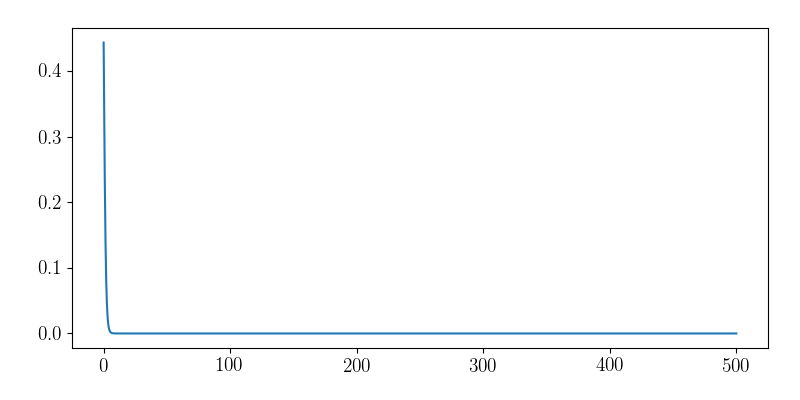

In [21]:
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.93,
                    right = 0.96, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)
ax1.plot(t, flux)

In [ ]:
sn.plot_lc()

In [ ]:
sn.load_list(os.path.join(coco_root_path,"lists/" + sn.name + ".list"))
sn.get_lcfit(os.path.join(coco_root_path, "recon/" + sn.name + ".dat"))

In [ ]:
sn.plot_lc(multiplot=False)

In [ ]:
sn.plot_lc()

In [ ]:
sn.load_spec()
sn.check_overlaps()

In [ ]:
sn.plot_lc(multiplot=False)

In [ ]:
import pyCoCo as pccsims
# filter_path = "/Users/berto/Code/CoCo/data/filters"
# coco_root_path = "/Users/berto/Code/CoCo"
coco_root_path = os.environ["COCO_ROOT_DIR"]
filter_path = os.path.join(coco_root_path, "data/filters")

coco = pccsims.pyCoCo(pcc.utils.b(filter_path), pcc.utils.b(coco_root_path))